# Facial Emotion Recognition using CNN 

## **Importing libraries**

In [ ]:
!pip install -U plotly

     |████████████████████████████████| 26.5 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')


Bad key text.latex.preview in file C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably need 

## **Importing and viewing the dataset**

In [2]:
import os
#print(os.listdir('/kaggle/input/fer2013'))

for dirname, _, filenames in os.walk('/kaggle/input/fer2013'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/‏‏archive2.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train2/sad/Training_65242339.jpg  
  inflating: train2/sad/Training_65267116.jpg  
  inflating: train2/sad/Training_65275626.jpg  
  inflating: train2/sad/Training_6529266.jpg  
  inflating: train2/sad/Training_65329617.jpg  
  inflating: train2/sad/Training_65338712.jpg  
  inflating: train2/sad/Training_65338797.jpg  
  inflating: train2/sad/Training_65387162.jpg  
  inflating: train2/sad/Training_65404494.jpg  
  inflating: train2/sad/Training_65426218.jpg  
  inflating: train2/sad/Training_65430136.jpg  
  inflating: train2/sad/Training_65437377.jpg  
  inflating: train2/sad/Training_6545735.jpg  
  inflating: train2/sad/Training_65463385.jpg  
  inflating: train2/sad/Training_65473985.jpg  
  inflating: train2/sad/Training_65502829.jpg  
  inflating: train2/sad/Training_65505359.jpg  
  inflating: train2/sad/Training_65508578.jpg  
  inflating: train2/sad/Training_65516023.jpg  
  inflating: train2/sad/Training_655240

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/‏‏archive2.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/')
zip_ref.close()

In [9]:
train_dir = '/content/train2'
test_dir = '/content/test2'
#train_dir = 'train2'
#test_dir = 'test2'

In [4]:
#import matplotlib.pyplot as plt

def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 
        

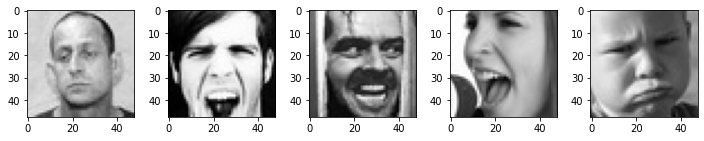

In [ ]:
plot_images('/content/train2/angry')

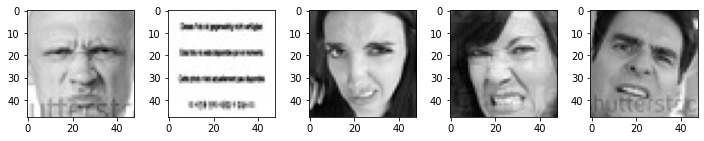

In [ ]:
plot_images('/content/train2/disgust')

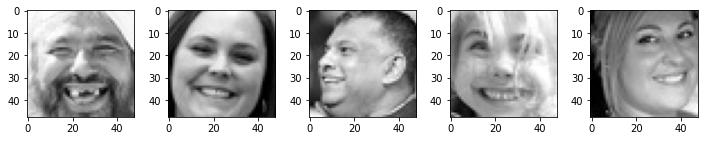

In [ ]:
plot_images('/content/train2/happy')

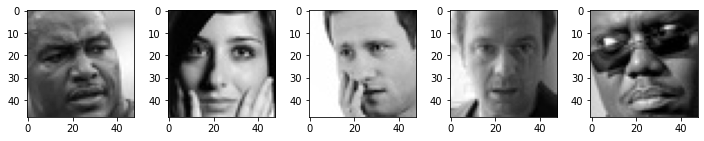

In [ ]:
plot_images('/content/train2/fear')

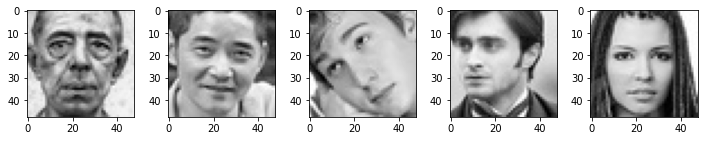

In [ ]:
plot_images('/content/train2/neutral')

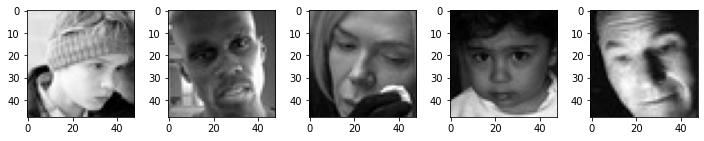

In [ ]:
plot_images('/content/train2/sad')

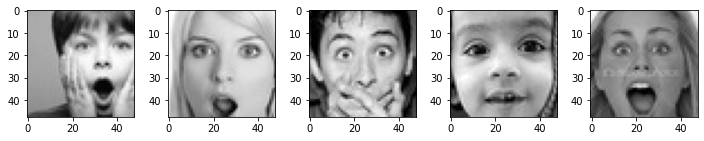

In [ ]:
plot_images('/content/train2/surprise')

In [ ]:
## count of each classes in train set
emotion_labels = sorted(os.listdir(train_dir))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
## count of each classes in test set
emotion_labels_test = sorted(os.listdir(test_dir))
print(emotion_labels_test)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
        'train2',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [ ]:
# Preprocess all test images
validation_generator = validation_data_gen.flow_from_directory(
        'test2',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [10]:
df1 = {}
#for expression in os.listdir("/content/train2"):
for expression in os.listdir("train2"):
    #directory = "/content/train2/" + expression
    directory = "train2/" + expression
    df1[expression] = len(os.listdir(directory))
df1 = pd.DataFrame(df1, index=[0])
##
df2 = {}
#for expression in os.listdir("/content/test2"):
for expression in os.listdir("test2"):
    #directory = "/content/test2/" + expression
    directory = "test2/" + expression
    df2[expression] = len(os.listdir(directory))
df2 = pd.DataFrame(df2, index=[0])

In [6]:
#pd.options.plotting.backend = 'matplotlib'
#import plotly.express as px

In [7]:
pd.options.plotting.backend = "plotly"
fig = df1.transpose().plot.bar(title="Training Set")
fig.show()
df1

angry  disgust  fear  happy  neutral   sad  surprise
0   3995      436  4097   7215     4965  4830      3171

In [8]:
fig = df2.transpose().plot.bar(title="Testing Set")
fig.show()
df2

angry  disgust  fear  happy  neutral   sad  surprise
0    958      111  1024   1774     1233  1247       831

## **Model Building**

In [ ]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
import tensorflow as tf
print("Tensorflow version:", tf.__version__)
import pydot
import graphviz
#from keras.utils import plot_model
# 1 from keras.utils.vis_utils import plot_model
# 2 from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model
import csv
from PIL import Image
from scipy.ndimage import rotate
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Tensorflow version: 2.7.0


## **VGG16 Model Transfer Learning**

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import image
from glob import  glob
from keras.models import Model

### VGG16_1

In [ ]:
METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy')]

In [ ]:
from keras import layers

IMAGE_SIZE = 48
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

num_epochs = 15
batch_size = 64

pre_trained_model = VGG16(input_shape=INPUT_SHAPE, include_top=False, weights='imagenet')

for layer in pre_trained_model.layers[:20]:
    layer.trainable = False

for layer in pre_trained_model.layers[20:]:           # I'll retrain the network from 20th layer
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
x = GlobalMaxPooling2D()(last_output)

x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

x = layers.Dense(7, activation='softmax')(x)

modelVgg = Model(pre_trained_model.input, x)

modelVgg.compile(loss='categorical_crossentropy',
              optimizer= Adam(lr=0.0001),    # we used different learning rates. Turned out, 1e-4 is performing the best among them.
              metrics=METRICS)


### Model Summary & Visualization

In [ ]:
modelVgg.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

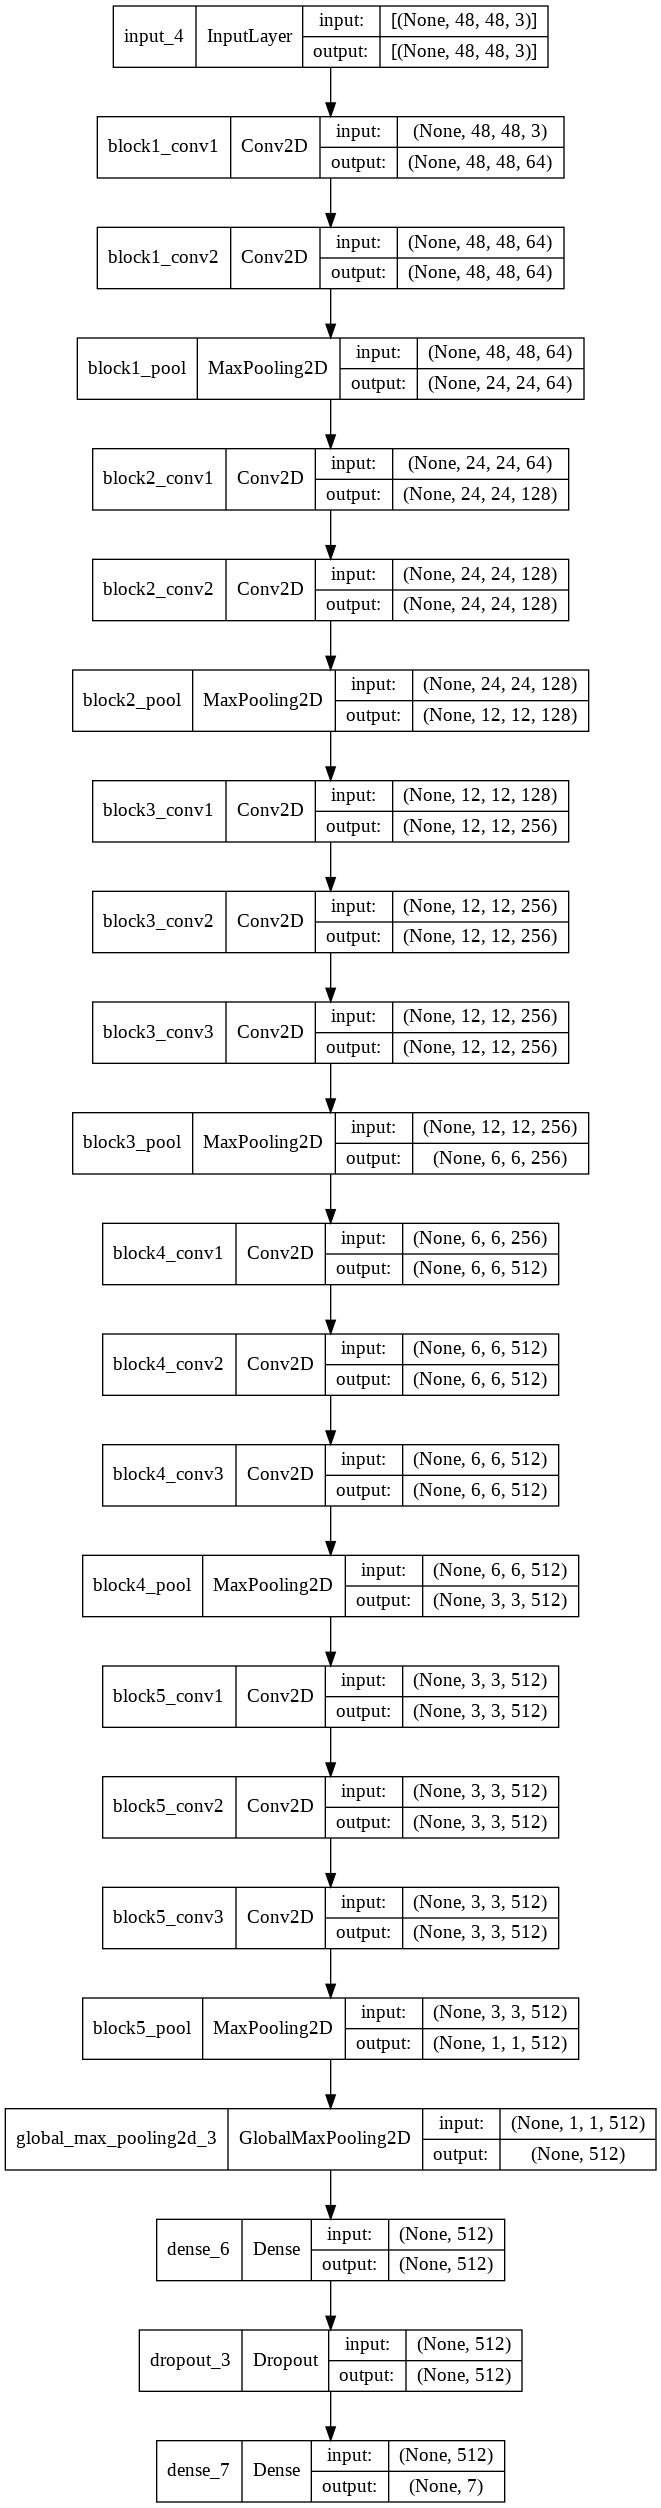

In [ ]:
plot_model(modelVgg, to_file="modelVgg.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('modelVgg.png'))

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=5,
                                   rescale=1./255,
                                   validation_split=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

In [ ]:
train_dataset = train_datagen.flow_from_directory(directory='/content/train2',
                                                  target_size=(48,48),
                                                  class_mode='categorical',
                                                  subset='training',
                                                  batch_size=64)

valid_dataset = valid_datagen.flow_from_directory(directory='/content/train2',
                                                  target_size=(48,48),
                                                  class_mode='categorical',
                                                  subset='validation',
                                                  batch_size=64)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


### Callbacks Function 

In [ ]:
# train_dataset== train_generator 
# valid_dataset == validation_generator
lrd = ReduceLROnPlateau(monitor ='val_loss', 
                        patience = 3,
                        verbose = 1,
                        factor = 0.50,
                        min_lr = 1e-10)

mcp = ModelCheckpoint('model_vgg16.h5',
                       save_best_only=True,
                      monitor='val_loss')

es = EarlyStopping(verbose=1,
                   patience=3)

### Training Model

In [ ]:
history_modelVgg = modelVgg.fit_generator(train_dataset,
                              epochs=15,
                              callbacks=[lrd,mcp,es],
                              validation_data=valid_dataset,
                              validation_steps=5741//batch_size,
                              steps_per_epoch=22968//batch_size)

Epoch 1/15
358/358 [==============================] - 687s 2s/step - loss: 1.8210 - accuracy: 0.8557 - val_loss: 1.6968 - val_accuracy: 0.8574 - lr: 1.0000e-04
Epoch 2/15
358/358 [==============================] - 685s 2s/step - loss: 1.7096 - accuracy: 0.8580 - val_loss: 1.6643 - val_accuracy: 0.8588 - lr: 1.0000e-04
Epoch 3/15
358/358 [==============================] - 684s 2s/step - loss: 1.6786 - accuracy: 0.8587 - val_loss: 1.6481 - val_accuracy: 0.8593 - lr: 1.0000e-04
Epoch 4/15
358/358 [==============================] - 684s 2s/step - loss: 1.6619 - accuracy: 0.8594 - val_loss: 1.6396 - val_accuracy: 0.8601 - lr: 1.0000e-04
Epoch 5/15
358/358 [==============================] - 694s 2s/step - loss: 1.6533 - accuracy: 0.8597 - val_loss: 1.6330 - val_accuracy: 0.8606 - lr: 1.0000e-04
Epoch 6/15
358/358 [==============================] - 687s 2s/step - loss: 1.6394 - accuracy: 0.8600 - val_loss: 1.6231 - val_accuracy: 0.8610 - lr: 1.0000e-04
Epoch 7/15
358/358 [====================

## Save Model

In [ ]:
# save model structure in jason file
model_json = modelVgg.to_json()
with open("model_vgg16.json", "w") as json_file:
    json_file.write(model_json)


In [ ]:
# save trained model weight in .h5 file
modelVgg.save_weights('model_vgg16.h5')
#tf.keras.models.save_model(model, '') 

## Plotting Loss and Accuracy Curves with Epochs

In [ ]:
epochs=15
metric = "loss"
metric2 = "accuracy"
train_m1 = history_modelVgg.history[metric]
train_m2 = history_modelVgg.history[metric2]
val_m1 = history_modelVgg.history[f'val_{metric}']
val_m2 = history_modelVgg.history[f'val_{metric2}']

fig_model = make_subplots(1,2,
                          subplot_titles=(f"{metric.capitalize()} over Time",
                                          f"{metric2.capitalize()} over Time"))
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m1,
                               mode="lines+markers",
                               name=f"Training {metric.capitalize()}"),
                    row=1,
                    col=1)
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m1,
                               mode="lines+markers",
                               name=f"Validation {metric.capitalize()}"),
                    row=1,
                    col=1)

fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m2,
                               mode="lines+markers",
                               name=f"Training {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m2,
                               mode="lines+markers",
                               name=f"Validation {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model.show()

### Model evaluation

In [ ]:
# Final evaluation of the model
metrics = modelVgg.evaluate(valid_dataset, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

90/90 [==============================] - 135s 1s/step - loss: 1.5898 - accuracy: 0.8631
Test Accuracy: 0.8630902171134949
Test Loss: 1.5897533893585205


In [ ]:
epochs = 30
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint(filepath='/content/model_vgg16.h5',
                      save_best_only=True,
                      monitor='val_loss')

es = EarlyStopping(verbose=1, patience=3)

In [ ]:
history_modelVgg = modelVgg.fit_generator(train_dataset,
                                          epochs=30,
                                          callbacks=[lrd,mcp,es],
                                          validation_data= valid_dataset,
                                          validation_steps= 5741//batch_size,
                                          steps_per_epoch= 22968//batch_size)

Epoch 1/30
358/358 [==============================] - 692s 2s/step - loss: 1.5954 - accuracy: 0.8625 - val_loss: 1.5882 - val_accuracy: 0.8628 - lr: 1.0000e-04
Epoch 2/30
358/358 [==============================] - 690s 2s/step - loss: 1.5933 - accuracy: 0.8622 - val_loss: 1.5888 - val_accuracy: 0.8631 - lr: 1.0000e-04
Epoch 3/30
358/358 [==============================] - 688s 2s/step - loss: 1.5920 - accuracy: 0.8624 - val_loss: 1.5806 - val_accuracy: 0.8627 - lr: 1.0000e-04
Epoch 4/30
358/358 [==============================] - 689s 2s/step - loss: 1.5839 - accuracy: 0.8629 - val_loss: 1.5800 - val_accuracy: 0.8626 - lr: 1.0000e-04
Epoch 5/30
358/358 [==============================] - 690s 2s/step - loss: 1.5813 - accuracy: 0.8628 - val_loss: 1.5766 - val_accuracy: 0.8631 - lr: 1.0000e-04
Epoch 6/30
358/358 [==============================] - 688s 2s/step - loss: 1.5799 - accuracy: 0.8629 - val_loss: 1.5797 - val_accuracy: 0.8633 - lr: 1.0000e-04
Epoch 7/30
358/358 [====================

## Plotting Loss and Accuracy Curves with 30 Epochs

In [ ]:
epochs=30
metric = "loss"
metric2 = "accuracy"
train_m1 = history_modelVgg.history[metric]
train_m2 = history_modelVgg.history[metric2]
val_m1 = history_modelVgg.history[f'val_{metric}']
val_m2 = history_modelVgg.history[f'val_{metric2}']

fig_model = make_subplots(1,2,
                          subplot_titles=(f"{metric.capitalize()} over Time",
                                          f"{metric2.capitalize()} over Time"))
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m1,
                               mode="lines+markers",
                               name=f"Training {metric.capitalize()}"),
                    row=1,
                    col=1)
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m1,
                               mode="lines+markers",
                               name=f"Validation {metric.capitalize()}"),
                    row=1,
                    col=1)

fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m2,
                               mode="lines+markers",
                               name=f"Training {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m2,
                               mode="lines+markers",
                               name=f"Validation {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model.show()

### Model evaluation

In [ ]:
# Final evaluation of the model
metrics = modelVgg.evaluate(valid_dataset, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

90/90 [==============================] - 135s 2s/step - loss: 1.5736 - accuracy: 0.8640
Test Accuracy: 0.8640355467796326
Test Loss: 1.5735872983932495


In [ ]:
# save model structure in jason file
model_json = modelVgg.to_json()
with open("model_vgg16.json", "w") as json_file:
    json_file.write(model_json)


In [ ]:
# save trained model weight in .h5 file
modelVgg.save_weights('model_vgg16.h5')

In [ ]:
y_pred = modelVgg.predict(train_dataset)
y_pred = np.argmax(y_pred, axis=1)
class_labels = valid_dataset.class_indices
class_labels = {v:k for k,v in class_labels.items()}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(train_dataset.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_dataset.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 161    0  175 1364  565  555  376]
 [  21    0   22  141   65   59   41]
 [ 150    0  170 1361  601  602  394]
 [ 268    0  287 2445 1064 1033  675]
 [ 188    0  203 1645  729  722  485]
 [ 184    0  209 1643  715  675  438]
 [ 112    0  135 1069  427  486  308]]
Classification Report
              precision    recall  f1-score   support

       angry       0.15      0.05      0.08      3196
     disgust       0.00      0.00      0.00       349
        fear       0.14      0.05      0.08      3278
       happy       0.25      0.42      0.32      5772
     neutral       0.17      0.18      0.18      3972
         sad       0.16      0.17      0.17      3864
    surprise       0.11      0.12      0.12      2537

    accuracy                           0.20     22968
   macro avg       0.14      0.14      0.13     22968
weighted avg       0.17      0.20      0.17     22968



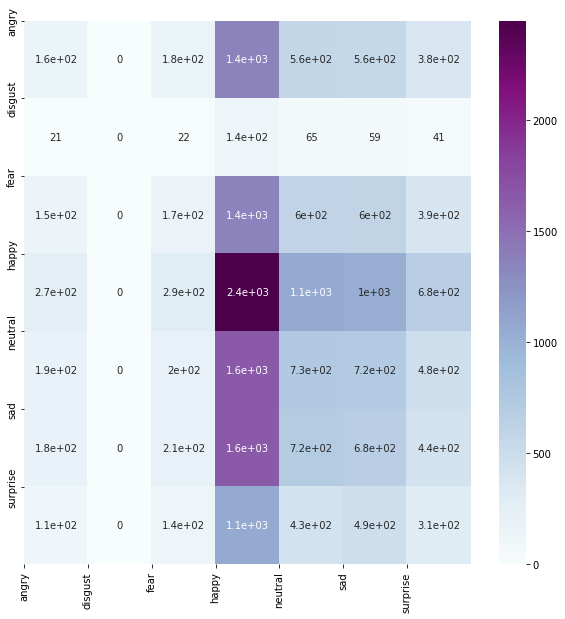

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm_train, annot=True, annot_kws={"size": 10}, cmap="BuPu")
#plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

## **Test Emotion Detector**

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json

In [ ]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('/content/model_vgg16.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
modelVgg = model_from_json(loaded_model_json) #emotion_model

# load weights into new model
modelVgg.load_weights("/content/model_vgg16.h5")
print("Loaded model from disk")


Loaded model from disk


In [ ]:
from google.colab.patches import cv2_imshow

# start the webcam feed
#cap = cv2.VideoCapture(0)

# pass here your video path
cap = cv2.VideoCapture("/content/Job Interview_ I Want to Learn (ESL).mp4")

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -3), 0)
        print(cropped_img.shape)
        #break


        # predict the emotions
        emotion_prediction = modelVgg.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    ##break
    cv2_imshow(frame)
    ##cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()